# Educational Attainment of Foster Youth: Outcomes for Children in State Care
-----------------------------------------------------------

## Introduction
--------------------

According to the National Data Archive on Child Abuse and Neglect (NDACAN),  each year, about 10% of children who exit foster care are discharged each year due to having reached the states age limit for eligibility. These children are at increased risk of unemployment, criminal conviction, substance abuse, lower educational attainment, homelessness, and poor mental health in adulthood (Child Abuse and Neglect, 2011).  A positive education experience has the potential to be a powerful counterweight to the abuse, neglect, separation, impermanence and other barriers these vulnerable children experience. 

Participation in and persistence to a post-secondary credential can enhance the foster youths well-being, help them make more successful transitions to adulthood, and increase their chances for personal fulfillment and economic self-sufficiency. National research shows that children in foster care are at high risk of dropping out of school and are unlikely to attend or graduate from college. My analysis is intended to help look into the NYTD services provided by the Chafee Act and educational outcomes to determine if they are good predictors of success for the foster youth. 

The John H. Chafee Foster Care Independence Act of 1999 provided states with flexible funding intended to serve youth at risk of exiting foster care without permanency, and required that states track the services received by youth as well as youth outcomes. The data system developed to meet this requirement is referred to as National Youth in Transition Database (NYTD). 

## Client
-----------
Analyzing the educational outcomes and the services utilized by the foster youth can play an invaluable role in helping to highlight and better assess child welfare services and programs.

## Dataset
-------------
 - National Youth in Transition Database (NYTD) Outcomes File, FY 2011- 2016
NYTD outcomes database collects information about current and former foster youth as the youth transition from foster care to independence. Foster youth who turned 17 years old in Federal Fiscal Year (FFY) 2011 participated in the first-ever NYTD survey, and were followed up when they reached 19  years of age (in FFY 2013).

- National Youth in Transition Database (NYTD) Service File, FY 2011- 2016
NYTD services database collects information on all youth who receive at least one independent living skills service paid for or provided by a Chafee funded county or agency, regardless of their foster care status and regardless of their age. This is the Services population.


- Adoption and Foster Care Analysis and Reporting System (AFCARS) Annual File, FY 2000 - Present
AFCARS collects case-level information on all children in foster care for whom State child welfare agencies have responsibility of placement, care, or supervision and on children who are adopted under the auspices of the State's public child welfare agency.

## Acknowlegements
---------------------------
Thank you to my mentor, Abhishek Sharma, for all your support and assistance on this project.


The data used for my project were made available by the National Data Archive on Child Abuse and Neglect (NDACAN), Cornell University, Ithaca, NY, and have been used with permission. Data from the NYTD and AFCARS were originally collected by the states and provided to the Children’s Bureau. Funding for the project was provided by the Children’s Bureau, Administration on Children, Youth and Families, Administration for Children and Families, U.S. Department of Health and Human Services. The collector of the original data, the funder, the Archive, Cornell University and their agents or employees bear no responsibility for the analyses or interpretations presented here.


## Data Collection and Wrangling
-----------------------------------------
Before performing exploratory analysis, we must clean the data first. Analysis performed with Python.

1) Import STATA files as a Pandas DataFrame

In [179]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [180]:
# import NYTD Services file as a Pandas DataFrame
nytd_services = pd.io.stata.read_stata('NYTD Services 2011-2016.dta')

nytd_services.head()

,fy,stfips,st,repdate,recnumbr,dob,sex,amiakn,asian,blkafram,...,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,stfcid,race,raceethn,agemp
0,2013,1,AL,201309,000000009831,1998-07-15,Female,No,No,No,...,Yes,No,No,No,No,No,AL000000009831,White Only,"NH, White Only",14
1,2014,1,AL,201409,000000009831,1998-07-15,Female,No,No,No,...,Yes,No,No,No,No,No,AL000000009831,White Only,"NH, White Only",15
2,2015,1,AL,201509,000000009831,1998-07-15,Female,No,No,No,...,Yes,No,No,No,No,No,AL000000009831,White Only,"NH, White Only",16
3,2011,1,AL,201109,000000014871,1996-08-15,Female,No,No,Yes,...,No,No,No,No,No,No,AL000000014871,Black Only,"NH, Black Only",14
4,2012,1,AL,201209,000000014871,1996-08-15,Female,No,No,Yes,...,No,No,No,No,No,No,AL000000014871,Black Only,"NH, Black Only",15


In [181]:
# import NYTD Outcomes file as a Pandas DataFrame
nytd_outcomes = pd.io.stata.read_stata('Cohort14W2.dta')

nytd_outcomes.head()

,wave,stfcid,stfips,st,recnumbr,repdate,dob,sex,amiakn,asian,...,othrhlthin,medicalin,mentlhlthin,prescripin,baseline,fy14cohort,elig19,samplestate,insample,responded
0,Age 17 Baseline Survey,AL000000007183,1,AL,000000007183,201403,1996-10-15,female,no,no,...,no,yes,yes,yes,yes,no,no,no,no,yes
1,Age 17 Baseline Survey,AL000000038434,1,AL,000000038434,201409,1997-05-15,male,no,no,...,no,yes,yes,yes,yes,no,no,no,no,yes
2,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
3,Age 17 Baseline Survey,AL000000059581,1,AL,000000059581,201403,1996-11-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no
4,Age 17 Baseline Survey,AL000000121244,1,AL,000000121244,201409,1997-07-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no


2) Check for missing values:

In [182]:
nytd_services.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022724 entries, 0 to 1022723
Data columns (total 39 columns):
fy            1022724 non-null int16
stfips        1022724 non-null int8
st            1022724 non-null object
repdate       1022724 non-null object
recnumbr      1022724 non-null object
dob           1022724 non-null object
sex           1022724 non-null category
amiakn        1022724 non-null category
asian         1022724 non-null category
blkafram      1022724 non-null category
hawaiipi      1022724 non-null category
white         1022724 non-null category
raceunkn      1022724 non-null category
racedcln      1022724 non-null category
hisorgin      1022724 non-null category
fcstatsv      1022724 non-null category
lclfipssv     1022724 non-null category
tribesv       1022724 non-null category
delinqntsv    1022724 non-null category
edlevlsv      1022724 non-null category
specedsv      1022724 non-null category
ilnasv        1022724 non-null category
acsuppsv      1022724 

In [183]:
nytd_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40262 entries, 0 to 40261
Data columns (total 47 columns):
wave           40262 non-null category
stfcid         40262 non-null object
stfips         40262 non-null int8
st             40262 non-null object
recnumbr       40262 non-null object
repdate        40262 non-null object
dob            40262 non-null object
sex            40262 non-null category
amiakn         40262 non-null category
asian          40262 non-null category
blkafram       40262 non-null category
hawaiipi       40262 non-null category
white          40262 non-null category
raceunkn       40262 non-null category
racedcln       40262 non-null category
hisorgin       40262 non-null category
outcmrpt       40262 non-null category
outcmdte       40262 non-null object
outcmfcs       40262 non-null category
currfte        40262 non-null category
currpte        40262 non-null category
emplysklls     40262 non-null category
socsecrty      40262 non-null category
educaid   

No missing entries from both NYTD Datasets.

In [184]:
# Number of unique child ID that received services (RecNumbr = AFCARS Unique Child ID)
nytd_services['recnumbr'].nunique()

324463

In [185]:
# Foster Care Status - Services
fc = nytd_services.loc[nytd_services['fcstatsv'] == 'Yes, received services & was in FC']
fc['recnumbr'].nunique()

261588

- Number of youth in foster care receiving services (2011-2016): 261,588
- Number of youth no longer in foster care and still receiving services (2011-2016): 62,875

In [186]:
# Number of unique child IDs that participated in the baseline survey at age 17 (RecNumbr = AFCARS Unique Child ID)
nytd_outcomes['recnumbr'].nunique()

23781

In [187]:
# Create filtered DataFrame for wave 1 - Age 17 Baseline Survey
wave_1 = nytd_outcomes.loc[nytd_outcomes['wave'] == 'Age 17 Baseline Survey']
wave_1

,wave,stfcid,stfips,st,recnumbr,repdate,dob,sex,amiakn,asian,...,othrhlthin,medicalin,mentlhlthin,prescripin,baseline,fy14cohort,elig19,samplestate,insample,responded
0,Age 17 Baseline Survey,AL000000007183,1,AL,000000007183,201403,1996-10-15,female,no,no,...,no,yes,yes,yes,yes,no,no,no,no,yes
1,Age 17 Baseline Survey,AL000000038434,1,AL,000000038434,201409,1997-05-15,male,no,no,...,no,yes,yes,yes,yes,no,no,no,no,yes
2,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
3,Age 17 Baseline Survey,AL000000059581,1,AL,000000059581,201403,1996-11-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no
4,Age 17 Baseline Survey,AL000000121244,1,AL,000000121244,201409,1997-07-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no
5,Age 17 Baseline Survey,AL000000136739,1,AL,000000136739,201403,1997-02-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no
6,Age 17 Baseline Survey,AL000000193079,1,AL,000000193079,201403,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
7,Age 17 Baseline Survey,AL000000195457,1,AL,000000195457,201403,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
8,Age 17 Baseline Survey,AL000000198581,1,AL,000000198581,201409,1997-04-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
9,Age 17 Baseline Survey,AL000000198583,1,AL,000000198583,201403,1996-12-15,male,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no


In [188]:
# Create filtered DataFrame for wave 2 - Age 19 Followup
wave_2 = nytd_outcomes.loc[nytd_outcomes['wave'] == 'Age 19 Followup']
wave_2

,wave,stfcid,stfips,st,recnumbr,repdate,dob,sex,amiakn,asian,...,othrhlthin,medicalin,mentlhlthin,prescripin,baseline,fy14cohort,elig19,samplestate,insample,responded
23781,Age 19 Followup,AL000000046332,1,AL,000000046332,201603,1996-10-15,male,no,no,...,do not know,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23782,Age 19 Followup,AL000000193079,1,AL,000000193079,201603,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23783,Age 19 Followup,AL000000195457,1,AL,000000195457,201603,1996-10-15,male,no,no,...,yes,yes,yes,yes,yes,yes,yes,no,no,yes
23784,Age 19 Followup,AL000000198581,1,AL,000000198581,201609,1997-04-15,female,no,no,...,yes,do not know,not applicable,not applicable,yes,yes,yes,no,no,yes
23785,Age 19 Followup,AL000000199584,1,AL,000000199584,201609,1997-04-15,male,no,no,...,yes,yes,yes,yes,yes,yes,yes,no,no,yes
23786,Age 19 Followup,AL000000203185,1,AL,000000203185,201603,1997-03-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23787,Age 19 Followup,AL000000203921,1,AL,000000203921,201609,1997-05-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23788,Age 19 Followup,AL000000206382,1,AL,000000206382,201609,1997-07-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23789,Age 19 Followup,AL000000206479,1,AL,000000206479,201609,1997-09-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23790,Age 19 Followup,AL000000208296,1,AL,000000208296,201603,1997-01-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes


69% of wave 1(age 17 baseline) survey participants also completed the the wave 2 (age 19 followup) survey.

In [189]:
# Foster Youth at 17 - Currently in Foster Care (22,545)
wave_1.loc[wave_1['outcmfcs'] == 'yes']

,wave,stfcid,stfips,st,recnumbr,repdate,dob,sex,amiakn,asian,...,othrhlthin,medicalin,mentlhlthin,prescripin,baseline,fy14cohort,elig19,samplestate,insample,responded
0,Age 17 Baseline Survey,AL000000007183,1,AL,000000007183,201403,1996-10-15,female,no,no,...,no,yes,yes,yes,yes,no,no,no,no,yes
1,Age 17 Baseline Survey,AL000000038434,1,AL,000000038434,201409,1997-05-15,male,no,no,...,no,yes,yes,yes,yes,no,no,no,no,yes
2,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
3,Age 17 Baseline Survey,AL000000059581,1,AL,000000059581,201403,1996-11-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no
4,Age 17 Baseline Survey,AL000000121244,1,AL,000000121244,201409,1997-07-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no
5,Age 17 Baseline Survey,AL000000136739,1,AL,000000136739,201403,1997-02-15,female,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no
6,Age 17 Baseline Survey,AL000000193079,1,AL,000000193079,201403,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
7,Age 17 Baseline Survey,AL000000195457,1,AL,000000195457,201403,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
8,Age 17 Baseline Survey,AL000000198581,1,AL,000000198581,201409,1997-04-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
9,Age 17 Baseline Survey,AL000000198583,1,AL,000000198583,201403,1996-12-15,male,no,no,...,blank,blank,blank,blank,yes,no,no,no,no,no


95% of the 17 year olds that filled out the wave 1 survey, said they are in foster care.

In [190]:
# Foster Youth at 19 - Currently in Foster Care (4,909)
current_youth = wave_2.loc[wave_2['outcmfcs'] == 'yes']
current_youth

,wave,stfcid,stfips,st,recnumbr,repdate,dob,sex,amiakn,asian,...,othrhlthin,medicalin,mentlhlthin,prescripin,baseline,fy14cohort,elig19,samplestate,insample,responded
23783,Age 19 Followup,AL000000195457,1,AL,000000195457,201603,1996-10-15,male,no,no,...,yes,yes,yes,yes,yes,yes,yes,no,no,yes
23784,Age 19 Followup,AL000000198581,1,AL,000000198581,201609,1997-04-15,female,no,no,...,yes,do not know,not applicable,not applicable,yes,yes,yes,no,no,yes
23785,Age 19 Followup,AL000000199584,1,AL,000000199584,201609,1997-04-15,male,no,no,...,yes,yes,yes,yes,yes,yes,yes,no,no,yes
23786,Age 19 Followup,AL000000203185,1,AL,000000203185,201603,1997-03-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23789,Age 19 Followup,AL000000206479,1,AL,000000206479,201609,1997-09-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23790,Age 19 Followup,AL000000208296,1,AL,000000208296,201603,1997-01-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23791,Age 19 Followup,AL000000209854,1,AL,000000209854,201603,1997-01-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23792,Age 19 Followup,AL000000210509,1,AL,000000210509,201609,1997-06-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23793,Age 19 Followup,AL000000210770,1,AL,000000210770,201609,1997-04-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23794,Age 19 Followup,AL000000213077,1,AL,000000213077,201609,1997-09-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes


30% of the 19 year olds that filled out the wave 2 survey, said they are in foster care.

## Exploratory Data Analysis
------------------------------------

1) What is the education status of former youth by state?

In [191]:
# Former Youth at 19, OutcmFCS = Foster Care Status at Outcomes Collection
former_youth = wave_2.loc[wave_2['outcmfcs'] == 'no']
former_youth

,wave,stfcid,stfips,st,recnumbr,repdate,dob,sex,amiakn,asian,...,othrhlthin,medicalin,mentlhlthin,prescripin,baseline,fy14cohort,elig19,samplestate,insample,responded
23781,Age 19 Followup,AL000000046332,1,AL,000000046332,201603,1996-10-15,male,no,no,...,do not know,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23782,Age 19 Followup,AL000000193079,1,AL,000000193079,201603,1996-10-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23787,Age 19 Followup,AL000000203921,1,AL,000000203921,201609,1997-05-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23788,Age 19 Followup,AL000000206382,1,AL,000000206382,201609,1997-07-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23796,Age 19 Followup,AL000000219475,1,AL,000000219475,201603,1997-03-15,male,no,no,...,do not know,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23797,Age 19 Followup,AL000000220526,1,AL,000000220526,201609,1997-04-15,female,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23800,Age 19 Followup,AL000000221359,1,AL,000000221359,201609,1997-09-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23803,Age 19 Followup,AL000000230092,1,AL,000000230092,201609,1997-09-15,male,no,no,...,do not know,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes
23804,Age 19 Followup,AL000000236271,1,AL,000000236271,201609,1997-09-15,female,no,no,...,blank,blank,blank,blank,yes,yes,yes,no,no,no
23806,Age 19 Followup,AL000000237467,1,AL,000000237467,201609,1997-07-15,male,no,no,...,no,not applicable,not applicable,not applicable,yes,yes,yes,no,no,yes


In [192]:
# Group by current education enrollment (CurrEnroll) and state (st), count and sort values from highest to lowest
pd.options.display.max_rows
pd.set_option("display.max_rows",184)
former_youth.groupby(['currenroll','st']).size()

currenroll  st
no          AK     26
            AL     47
            AR     24
            CA    357
            CO     43
            CT     37
            DC      2
            DE     21
            FL     94
            GA     62
            HI     10
            IA     84
            ID     23
            IL     12
            IN     24
            KS    138
            KY     61
            LA     79
            MA     46
            MD     17
            ME      2
            MI     89
            MN     55
            MO     59
            MS     34
            MT     24
            NC     60
            ND     17
            NE     72
            NH     17
            NJ     69
            NM     14
            NV     44
            NY     47
            OH     88
            OK     79
            OR     34
            PA     84
            PR     24
            RI     34
            SC     60
            SD     27
            TN     78
            TX    109
            UT   

In [193]:
# Group former youth by current education enrollment (CurrEnroll) 
former_youth.groupby('currenroll').size()

currenroll
no          2886
yes         2313
declined     177
blank       6195
dtype: int64

### Current Enrollment And Attendance (CurrEnroll)

“Yes” means the youth is enrolled in and attending high school, GED classes, or postsecondary vocational training or college, as of the date of the outcome data collection. A youth is still considered enrolled in and attending school if the youth would otherwise be enrolled in and attending a school that is currently out of session.

“Declined” means the youth did not answer this question.


- Former Foster Youth Enrolled and Attending School: 2,313
- Former Foster Youth Not Enrolled and Attending School: 2,886
- Unknown Education Status of Former Foster Youth (Either declined or left question blank): 6,372


#### 44% of former youth who answered this question said they are enrolled and attending school. More than half of former youth said they are not enrolled in school. 
#### ** This does not include the 6,372 that left this question blank.

2) Are the youth in foster care enrolled and attending school?

In [194]:
# Group current youth by current education enrollment (CurrEnroll) 
current_youth.groupby('currenroll').size()

currenroll
no          1152
yes         2345
declined      57
blank       1355
dtype: int64

#### Better education outcome from youth who are in foster care

- Current Foster Youth Enrolled and Attending School: 2,345
- Current Foster Youth Not Enrolled and Attending School: 1,152
- Unknown Education Status of Current Foster Youth (Either declined or left question blank): 1,412

#### 67% of current youth who answered this question said they are enrolled and attending school. 33% are not enrolled in schoool
#### ** This does not include the1,412 that left this question blank.

3) What is the highest level of education received by a majority of former youth?

In [195]:
# Group former youth by Highest Educational Certification Received (HighEdCert)
former_youth.groupby('highedcert').size().sort_values(ascending = False)

highedcert
blank                     6206
high school or ged        3013
none of the above         2072
declined                   155
vocational certificate      73
vocational license          36
associate degree             8
higher degree                6
bachelor degree              2
dtype: int64

### Highest Educational Certification Received (HighEdCert)

A youth has received an education certificate if the youth has a high school diploma or general equivalency degree (GED), vocational certificate, vocational license, associate’s degree (e.g., A.A.), bachelor’s degree (e.g., B.A. or B.S.), or a higher degree as of the date of the outcome data collection. Indicate the highest degree that the youth has received.

- Highest Level of Education by Most Former Foster Youth: High School or GED
- A high number of youth participants did not answer this question (blank or declined): 6,361
- 125 out of 5195 (Not including blank entries) have a postsecondary vocational training or college education.


4) Explore the relationship between educational outcomes and services (e.g., Post-secondary educational support)

In [196]:
# List column names from wave_2 and nytd_services dataframe
wave_2_cols = wave_2.columns.tolist()
# print(wave_2_cols)

nytd_serv_cols = nytd_services.columns.tolist()
# print(nytd_serv_cols)

# combine both list (col names from each dataframe) and drop duplicate column names
cols_to_use = list(wave_2_cols)
cols_to_use.extend(x for x in nytd_serv_cols if x not in cols_to_use)
print(cols_to_use)
# dfNew = merge(df, df2[cols_to_use], left_index=True, right_index=True, how='outer')

['wave', 'stfcid', 'stfips', 'st', 'recnumbr', 'repdate', 'dob', 'sex', 'amiakn', 'asian', 'blkafram', 'hawaiipi', 'white', 'raceunkn', 'racedcln', 'hisorgin', 'outcmrpt', 'outcmdte', 'outcmfcs', 'currfte', 'currpte', 'emplysklls', 'socsecrty', 'educaid', 'pubfinas', 'pubfoodas', 'pubhousas', 'othrfinas', 'highedcert', 'currenroll', 'cnctadult', 'homeless', 'subabuse', 'incarc', 'children', 'marriage', 'medicaid', 'othrhlthin', 'medicalin', 'mentlhlthin', 'prescripin', 'baseline', 'fy14cohort', 'elig19', 'samplestate', 'insample', 'responded', 'fy', 'fcstatsv', 'lclfipssv', 'tribesv', 'delinqntsv', 'edlevlsv', 'specedsv', 'ilnasv', 'acsuppsv', 'psedsuppsv', 'careersv', 'emplytrsv', 'budgetsv', 'housedsv', 'hlthedsv', 'famsuppsv', 'mentorsv', 'silsv', 'rmbrdfasv', 'educfinasv', 'othrfinasv', 'race', 'raceethn', 'agemp']


In [197]:
# Merge NYTD outcomes to NYTD Services Dataset
df = pd.merge(nytd_outcomes, nytd_services, on='stfcid', how='left')
df

,wave,stfcid,stfips_x,st_x,recnumbr_x,repdate_x,dob_x,sex_x,amiakn_x,asian_x,...,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,race,raceethn,agemp
0,Age 17 Baseline Survey,AL000000007183,1,AL,000000007183,201403,1996-10-15,female,no,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Age 17 Baseline Survey,AL000000038434,1,AL,000000038434,201409,1997-05-15,male,no,no,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",16
2,Age 17 Baseline Survey,AL000000038434,1,AL,000000038434,201409,1997-05-15,male,no,no,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",18
3,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,no,no,...,Yes,No,No,No,No,No,No,Black Only,"NH, Black Only",14
4,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,no,no,...,Yes,No,No,No,No,No,No,Black Only,"NH, Black Only",15
5,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,no,no,...,Yes,No,No,No,No,No,No,Black Only,"NH, Black Only",16
6,Age 17 Baseline Survey,AL000000059581,1,AL,000000059581,201403,1996-11-15,female,no,no,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",16
7,Age 17 Baseline Survey,AL000000121244,1,AL,000000121244,201409,1997-07-15,female,no,no,...,No,No,No,No,No,No,No,White Only,"NH, White Only",13
8,Age 17 Baseline Survey,AL000000121244,1,AL,000000121244,201409,1997-07-15,female,no,no,...,No,No,No,No,No,No,No,White Only,"NH, White Only",14
9,Age 17 Baseline Survey,AL000000121244,1,AL,000000121244,201409,1997-07-15,female,no,no,...,No,No,No,No,No,No,No,White Only,"NH, White Only",15


In [198]:
# Drop duplicate Child IDs
df = df.drop_duplicates(['stfcid'])
df

,wave,stfcid,stfips_x,st_x,recnumbr_x,repdate_x,dob_x,sex_x,amiakn_x,asian_x,...,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,race,raceethn,agemp
0,Age 17 Baseline Survey,AL000000007183,1,AL,000000007183,201403,1996-10-15,female,no,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Age 17 Baseline Survey,AL000000038434,1,AL,000000038434,201409,1997-05-15,male,no,no,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",16
3,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,no,no,...,Yes,No,No,No,No,No,No,Black Only,"NH, Black Only",14
6,Age 17 Baseline Survey,AL000000059581,1,AL,000000059581,201403,1996-11-15,female,no,no,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",16
7,Age 17 Baseline Survey,AL000000121244,1,AL,000000121244,201409,1997-07-15,female,no,no,...,No,No,No,No,No,No,No,White Only,"NH, White Only",13
11,Age 17 Baseline Survey,AL000000136739,1,AL,000000136739,201403,1997-02-15,female,no,no,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",17
12,Age 17 Baseline Survey,AL000000193079,1,AL,000000193079,201403,1996-10-15,male,no,no,...,No,No,No,No,No,No,Yes,Black Only,"NH, Black Only",18
13,Age 17 Baseline Survey,AL000000195457,1,AL,000000195457,201403,1996-10-15,male,no,no,...,No,No,No,No,No,No,No,Black Only,"NH, Black Only",15
16,Age 17 Baseline Survey,AL000000198581,1,AL,000000198581,201409,1997-04-15,female,no,no,...,Yes,No,Yes,No,No,No,No,Black Only,"NH, Black Only",15
19,Age 17 Baseline Survey,AL000000198583,1,AL,000000198583,201403,1996-12-15,male,no,no,...,Yes,Yes,Yes,No,No,Yes,Yes,Black Only,"NH, Black Only",18


In [199]:
# Drop duplicate columns (e.g: recnumbr_x and recnumber_y)

# define our drop function
def drop_y(df):
    # list comprehension of the cols that end with '_y'
    to_drop = [x for x in df if x.endswith('_y')]
    df.drop(to_drop, axis=1, inplace=True)

drop_y(df)
df

# func to rename '_x' cols
def rename_x(df):
    for col in df:
        if col.endswith('_x'):
            df.rename(columns={col:col.rstrip('_x')}, inplace=True)
rename_x(df)
df

/Users/angelakrontiris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/angelakrontiris/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,wave,stfcid,stfips,st,recnumbr,repdate,dob,se,amiakn,asian,...,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,race,raceethn,agemp
0,Age 17 Baseline Survey,AL000000007183,1,AL,000000007183,201403,1996-10-15,female,no,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Age 17 Baseline Survey,AL000000038434,1,AL,000000038434,201409,1997-05-15,male,no,no,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",16
3,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,no,no,...,Yes,No,No,No,No,No,No,Black Only,"NH, Black Only",14
6,Age 17 Baseline Survey,AL000000059581,1,AL,000000059581,201403,1996-11-15,female,no,no,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",16
7,Age 17 Baseline Survey,AL000000121244,1,AL,000000121244,201409,1997-07-15,female,no,no,...,No,No,No,No,No,No,No,White Only,"NH, White Only",13
11,Age 17 Baseline Survey,AL000000136739,1,AL,000000136739,201403,1997-02-15,female,no,no,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",17
12,Age 17 Baseline Survey,AL000000193079,1,AL,000000193079,201403,1996-10-15,male,no,no,...,No,No,No,No,No,No,Yes,Black Only,"NH, Black Only",18
13,Age 17 Baseline Survey,AL000000195457,1,AL,000000195457,201403,1996-10-15,male,no,no,...,No,No,No,No,No,No,No,Black Only,"NH, Black Only",15
16,Age 17 Baseline Survey,AL000000198581,1,AL,000000198581,201409,1997-04-15,female,no,no,...,Yes,No,Yes,No,No,No,No,Black Only,"NH, Black Only",15
19,Age 17 Baseline Survey,AL000000198583,1,AL,000000198583,201403,1996-12-15,male,no,no,...,Yes,Yes,Yes,No,No,Yes,Yes,Black Only,"NH, Black Only",18


The joined dataframe contains the services and survey outcomes.

In [200]:
# Eliminate rows containing null values (NaN)
df = df.dropna()
df

,wave,stfcid,stfips,st,recnumbr,repdate,dob,se,amiakn,asian,...,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,race,raceethn,agemp
1,Age 17 Baseline Survey,AL000000038434,1,AL,000000038434,201409,1997-05-15,male,no,no,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",16
3,Age 17 Baseline Survey,AL000000046332,1,AL,000000046332,201403,1996-10-15,male,no,no,...,Yes,No,No,No,No,No,No,Black Only,"NH, Black Only",14
6,Age 17 Baseline Survey,AL000000059581,1,AL,000000059581,201403,1996-11-15,female,no,no,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",16
7,Age 17 Baseline Survey,AL000000121244,1,AL,000000121244,201409,1997-07-15,female,no,no,...,No,No,No,No,No,No,No,White Only,"NH, White Only",13
11,Age 17 Baseline Survey,AL000000136739,1,AL,000000136739,201403,1997-02-15,female,no,no,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",17
12,Age 17 Baseline Survey,AL000000193079,1,AL,000000193079,201403,1996-10-15,male,no,no,...,No,No,No,No,No,No,Yes,Black Only,"NH, Black Only",18
13,Age 17 Baseline Survey,AL000000195457,1,AL,000000195457,201403,1996-10-15,male,no,no,...,No,No,No,No,No,No,No,Black Only,"NH, Black Only",15
16,Age 17 Baseline Survey,AL000000198581,1,AL,000000198581,201409,1997-04-15,female,no,no,...,Yes,No,Yes,No,No,No,No,Black Only,"NH, Black Only",15
19,Age 17 Baseline Survey,AL000000198583,1,AL,000000198583,201403,1996-12-15,male,no,no,...,Yes,Yes,Yes,No,No,Yes,Yes,Black Only,"NH, Black Only",18
22,Age 17 Baseline Survey,AL000000199584,1,AL,000000199584,201409,1997-04-15,male,no,no,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",14


In [201]:
#Set index to Recnumbr (Unique Child ID)
df.set_index('recnumbr')

,wave,stfcid,stfips,st,repdate,dob,se,amiakn,asian,blkafram,...,hlthedsv,famsuppsv,mentorsv,silsv,rmbrdfasv,educfinasv,othrfinasv,race,raceethn,agemp
recnumbr,,,,,,,,,,,,,,,,,,,,,
000000038434,Age 17 Baseline Survey,AL000000038434,1,AL,201409,1997-05-15,male,no,no,yes,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",16
000000046332,Age 17 Baseline Survey,AL000000046332,1,AL,201403,1996-10-15,male,no,no,yes,...,Yes,No,No,No,No,No,No,Black Only,"NH, Black Only",14
000000059581,Age 17 Baseline Survey,AL000000059581,1,AL,201403,1996-11-15,female,no,no,no,...,No,No,No,No,No,No,Yes,White Only,"NH, White Only",16
000000121244,Age 17 Baseline Survey,AL000000121244,1,AL,201409,1997-07-15,female,no,no,no,...,No,No,No,No,No,No,No,White Only,"NH, White Only",13
000000136739,Age 17 Baseline Survey,AL000000136739,1,AL,201403,1997-02-15,female,no,no,yes,...,No,No,No,No,No,Yes,No,Black Only,"NH, Black Only",17
000000193079,Age 17 Baseline Survey,AL000000193079,1,AL,201403,1996-10-15,male,no,no,yes,...,No,No,No,No,No,No,Yes,Black Only,"NH, Black Only",18
000000195457,Age 17 Baseline Survey,AL000000195457,1,AL,201403,1996-10-15,male,no,no,yes,...,No,No,No,No,No,No,No,Black Only,"NH, Black Only",15
000000198581,Age 17 Baseline Survey,AL000000198581,1,AL,201409,1997-04-15,female,no,no,yes,...,Yes,No,Yes,No,No,No,No,Black Only,"NH, Black Only",15
000000198583,Age 17 Baseline Survey,AL000000198583,1,AL,201403,1996-12-15,male,no,no,yes,...,Yes,Yes,Yes,No,No,Yes,Yes,Black Only,"NH, Black Only",18


In [202]:
# Capitalize all no, yes, and blank entries
df = df.replace('no','No').replace('yes','Yes').replace('blank','Blank')
df['currenroll']

1          Yes
3          Yes
6        Blank
7        Blank
11       Blank
12         Yes
13         Yes
16         Yes
19       Blank
22         Yes
26         Yes
31         Yes
32         Yes
36         Yes
37         Yes
40         Yes
42       Blank
43         Yes
46       Blank
47       Blank
50       Blank
51         Yes
56         Yes
57         Yes
60         Yes
62         Yes
67         Yes
69       Blank
71       Blank
73         Yes
77         Yes
80       Blank
81         Yes
84         Yes
85         Yes
86       Blank
88       Blank
90         Yes
92         Yes
93         Yes
96         Yes
97       Blank
98         Yes
101        Yes
105        Yes
106        Yes
112      Blank
116        Yes
119        Yes
120        Yes
121      Blank
125        Yes
127      Blank
131        Yes
134        Yes
135        Yes
138        Yes
142        Yes
143        Yes
145      Blank
147      Blank
151        Yes
156        Yes
159        Yes
162        Yes
163      Blank
165       

In [203]:
df.groupby('race').size()


race
White Only                7452
Black Only                4630
AmInd / AK Native Only     301
Asian Only                 154
Pac Islander Only           37
>1 Race                    850
Race Missing              1565
dtype: int64

5) Which services are utlilized the most?

- SpecEdSv: Special Education
- ILNAsv: Independent Living Needs Assessment
- AcSuppSv: Academic Support
- PSEdSuppSv: Post-Secondary Educational Support
- CareerSv: Career Preparation
- EmplyTrSv: Employment Programs Or Vocational
- BudgetSv: Budget And Financial Management
- HousEdSv: Housing Education And Home
- HlthEdSv: Health Education And Risk Prevention
- FamSuppSv: Family Support And Healthy Marriage
- MentorSv: Mentoring
- SILsv: Supervised Independent Living
- RmBrdFASv: Room And Board Financial Assistance
- EducFinASv: Education Financial Assistance
- OthrFinaSv: Other Financial Assistance

In [204]:
# Set up function to create education status column
def enrollment_status(row):
    if row == 'Yes':
        return 'Enrolled'
    elif row == 'No':
        return 'Not Enrolled'
    else: 
        return 'Neither'
    
# Apply function to 'currenroll column'
df['educstatus'] = df['currenroll'].apply(enrollment_status)

print(df['educstatus'])

1            Enrolled
3            Enrolled
6             Neither
7             Neither
11            Neither
12           Enrolled
13           Enrolled
16           Enrolled
19            Neither
22           Enrolled
26           Enrolled
31           Enrolled
32           Enrolled
36           Enrolled
37           Enrolled
40           Enrolled
42            Neither
43           Enrolled
46            Neither
47            Neither
50            Neither
51           Enrolled
56           Enrolled
57           Enrolled
60           Enrolled
62           Enrolled
67           Enrolled
69            Neither
71            Neither
73           Enrolled
77           Enrolled
80            Neither
81           Enrolled
84           Enrolled
85           Enrolled
86            Neither
88            Neither
90           Enrolled
92           Enrolled
93           Enrolled
96           Enrolled
97            Neither
98           Enrolled
101          Enrolled
105          Enrolled
106       

In [205]:
# Create table with enrollment status and NYTD services

# pd.crosstab(df.acsuppsv, [df.educstatus, df.ilnasv])

In [206]:
# List of NYTD services 
cols = ['specedsv', 'ilnasv', 'acsuppsv', 'psedsuppsv', 'careersv', 'emplytrsv', 'budgetsv', 'housedsv', 'hlthedsv', 'famsuppsv', 'mentorsv', 'silsv', 'rmbrdfasv', 'educfinasv', 'othrfinasv']

# Create list comprehension to count activity for each service and append to list of services
services = [ df.groupby(col).size() for col in cols ]

# Concatenate list of services into a dataframe
services_df = pd.concat(services, axis=1, keys=cols)

# Remove index name
services_df.index.name = None

print(services_df)

       specedsv  ilnasv  acsuppsv  psedsuppsv  careersv  emplytrsv  budgetsv  \
No        10888    7241      7856       12435     10682      12480     10749   
Yes        3401    7090      6475        1896      3649       1851      3582   
Blank       700     658       658         658       658        658       658   

       housedsv  hlthedsv  famsuppsv  mentorsv  silsv  rmbrdfasv  educfinasv  \
No        10477     10060      11145     12021  13464      13192       13044   
Yes        3854      4271       3186      2310    868       1139        1286   
Blank       658       658        658       658    657        658         659   

       othrfinasv  
No          11537  
Yes          2793  
Blank         659  


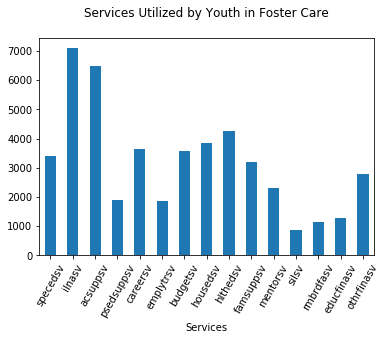

In [207]:
# Compare the services used by 14,989 foster youth
yes = services_df.iloc[1]

yes.plot(kind='bar', align='center', rot=60)
plt.xlabel('Services')
plt.title('Services Utilized by Youth in Foster Care\n')
plt.show()

##### Top 3 services used by foster youth:
------------------------------------------
- Independent Living Needs Assessment
- Academic Support
- Health Education And Risk Prevention

acsuppsv      6475
psedsuppsv    1896
educfinasv    1286
Name: Yes, dtype: int64


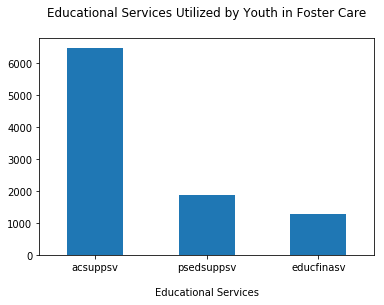

In [208]:
# Compare the educational services used by 14,989 foster youth
edu_servs = services_df.loc['Yes',['acsuppsv','psedsuppsv', 'educfinasv']]
print(edu_servs)

edu_servs.plot(kind='bar', rot=0)
plt.xlabel('\nEducational Services')
plt.title('Educational Services Utilized by Youth in Foster Care\n')
plt.show()

- 6,475 foster youth received academic support such as couseling, studying for an exam, help with homework, etc...

- 64% of foster youth are receiving educational support (Academic, Post-secondary, and Financial)

*** Not including blank responses 

In [209]:
# Replace all entries with 'declined' to 'blank'
df['currenroll'] = df['currenroll'].replace('declined','blank')
df['currenroll']

1          Yes
3          Yes
6        Blank
7        Blank
11       Blank
12         Yes
13         Yes
16         Yes
19       Blank
22         Yes
26         Yes
31         Yes
32         Yes
36         Yes
37         Yes
40         Yes
42       Blank
43         Yes
46       Blank
47       Blank
50       Blank
51         Yes
56         Yes
57         Yes
60         Yes
62         Yes
67         Yes
69       Blank
71       Blank
73         Yes
77         Yes
80       Blank
81         Yes
84         Yes
85         Yes
86       Blank
88       Blank
90         Yes
92         Yes
93         Yes
96         Yes
97       Blank
98         Yes
101        Yes
105        Yes
106        Yes
112      Blank
116        Yes
119        Yes
120        Yes
121      Blank
125        Yes
127      Blank
131        Yes
134        Yes
135        Yes
138        Yes
142        Yes
143        Yes
145      Blank
147      Blank
151        Yes
156        Yes
159        Yes
162        Yes
163      Blank
165       

In [210]:
# Educational Outcomes from wave -1 (baseline) and wave-2 followup survey 
# Highest Educational Certification Received
print('\n',df.groupby('highedcert').size())

# Current Educational Level
print('\n',df.groupby('edlevlsv').size())


 highedcert
Blank                      3573
associate degree              7
bachelor degree               8
declined                    456
high school or ged          521
higher degree                14
none of the above         10373
vocational certificate       31
vocational license            6
dtype: int64

 edlevlsv
Less than 6th grade     329
6th grade               404
7th grade               971
8th grade              2432
9th grade              3671
10th grade             3464
11th grade             1769
12th grade              629
Post secondary           54
College                  69
Blank                  1197
dtype: int64


educstatus
Enrolled        10640
Neither          3687
Not Enrolled      662
dtype: int64


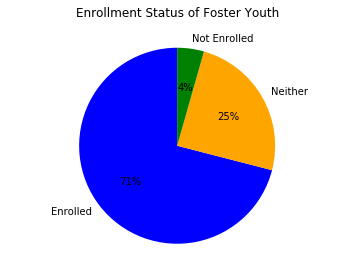

In [216]:
# Current Enrollment and Attendance
enrollment = df.groupby('educstatus').size()
print(enrollment)

labels = ['Enrolled', 'Neither','Not Enrolled']
colors =['blue','orange','green']

plt.pie(enrollment, labels=labels, colors=colors, startangle=90, autopct='%1.0f%%')
plt.axis('equal')
plt.title('Enrollment Status of Foster Youth\n', fontsize=12)
plt.show()

# Statistical Analysis
-----------------------------

Use df2 with all 15 services and the education status from baseline (age 17) and follow-up (age 19) survey. 

Positive education = Enrolled

List of services:
- SpecEdSv: Special Education
- ILNAsv: Independent Living Needs Assessment
- AcSuppSv: Academic Support
- PSEdSuppSv: Post-Secondary Educational Support
- CareerSv: Career Preparation
- EmplyTrSv: Employment Programs Or Vocational
- BudgetSv: Budget And Financial Management
- HousEdSv: Housing Education And Home
- HlthEdSv: Health Education And Risk Prevention
- FamSuppSv: Family Support And Healthy Marriage
- MentorSv: Mentoring
- SILsv: Supervised Independent Living
- RmBrdFASv: Room And Board Financial Assistance
- EducFinASv: Education Financial Assistance
- OthrFinaSv: Other Financial Assistance

1) Using Chi-square Statistic to see if there is a correlation between the services provided by a Chafee funded country and a positive education outcome for a foster youth?

In [212]:
# Create new dataframe with enrollment status and NYTD Services using groupby and unstack

df2 = pd.concat([df.groupby(['educstatus',e])[e].count().unstack() for e in cols],axis=1).fillna(0).astype(int)    
df2.columns=pd.MultiIndex.from_product([cols,['Yes','No','Blank']])

df2


specedsv             ilnasv             acsuppsv              \
                  Yes    No Blank    Yes    No Blank      Yes    No Blank   
educstatus                                                                  
Enrolled         7809  2464   367   5058  5245   337     5741  4562   337   
Neither          2578   793   316   1869  1510   308     1732  1647   308   
Not Enrolled      501   144    17    314   335    13      383   266    13   

             psedsuppsv  ...  silsv rmbrdfasv            educfinasv       \
                    Yes  ...  Blank       Yes   No Blank        Yes   No   
educstatus               ...                                               
Enrolled           8935  ...    336      9429  874   337       9324  979   
Neither            2921  ...    308      3153  226   308       3120  258   
Not Enrolled        579  ...     13       610   39    13        600   49   

                   othrfinasv              
             Blank        Yes    No Blank  
educstatus                                 
Enrolled       337       8178  2125   337  
Neither        309       2870   508   309  
Not Enrolled    13        489   160    13  

[3 rows x 45 columns]

In [213]:
# Use chi-square test to determine the relationship of services and educational attainment of foster youth 
from scipy.stats import chisquare

chisquare(df2)

Power_divergenceResult(statistic=array([ 7814.488795  ,  2527.44545722,   306.43142857,  4846.468996  ,
        5562.61636107,   293.07294833,  5931.77774949,  4457.14316602,
         293.07294833,  8964.6880579 ,  1404.7721519 ,   293.07294833,
        7449.18498409,  2933.01562072,   293.07294833,  8909.65721154,
        1462.56401945,   293.07294833,  7451.13647781,  2937.11725293,
         293.07294833,  7378.101174  ,  2995.71925272,   293.07294833,
        7119.87574553,  3252.27862327,   293.07294833,  8070.18734859,
        2300.45762712,   293.07294833,  8460.40578987,  1924.13766234,
         293.07294833,  9816.14572193,   560.55990783,   292.44748858,
        9371.57261977,  1011.49956102,   293.07294833,  9272.32382705,
        1110.74805599,   293.43854325,  8057.96532894,  2361.98281418,
         293.43854325]), pvalue=array([  0.00000000e+000,   0.00000000e+000,   2.87912649e-067,
         0.00000000e+000,   0.00000000e+000,   2.29096193e-064,
         0.00000000e+000, 

#### All the services are statistically significant when compared to educational attainement.

Another interesting study to examine is the impact that post-secondary services have on foster youth attending college or post-secondary education. 

2) Is there a relationship between foster youth receiving post-secondary support (e.g. college prep) and college/post-secondary attainment?

Education Level: highest educational level completed by the youth. Post-secondary education or training refers to any other post-seondary education other than college. College refers to completing at least one semester of college.

Post-secondary education support: services designed to help a youth enter or complete a post-secondary education and include the following: Classes for test preparation, such as the Scholastic Aptitude Test (SAT);counseling about college; information about financial aid and scholarships; help completing college or loan applications; tutoring while in college.

In [271]:
# College or post-secondary education completed by the youth
educ_psedsupp = df.groupby(['edlevlsv','psedsuppsv']).size()

# Filter groupby with only 'College' and 'Post secondary' entries
college = educ_psedsupp[['College', 'Post secondary']]
print(college)

edlevlsv        psedsuppsv
Post secondary  No            40
                Yes           14
College         No            48
                Yes           21
dtype: int64


- Out of the 54 foster youth that completed a post-secondary education, 14 received post-secondary services.
- Out of the 69 foster youth that completed a college education, 21 received post-secondary services.

#### 28% of foster youth that completed a college or post-seondary education also received post-secondary services.

In [267]:
# Use chi-square test to determine the relationship of post-secondary services and college/post-secondary educational attainment of foster youth 

chisquare(college)

Power_divergenceResult(statistic=24.674796747967481, pvalue=1.8056780035994287e-05)

Based on the p-value (0.0000181) for the chi-square statistic, there is a postive correlation between receivng post-secondary services and attainig a college degree.  Since a post-secondary education is an important indicator of success, the state care should educate these children on the post-secondary services and should be accessible to them.  

For foster youth not enrolled in school or highest level of education is below high school, do certain types of behavior (e.g. substance abuse, incarceration, and parenthood correlate with them. 

3) Is there a relationship between foster youths substance abuse and low level of education attainment?

In [308]:
# Replace all entries with 'declined' to 'blank' in 'subabuse','incarc','children' column
df['subabuse'] = df['subabuse'].replace('declined','Blank')
df['incarc'] = df['incarc'].replace('declined','Blank')
df['children'] = df['children'].replace('declined','Blank')

In [294]:
col_names = ['subabuse', 'incarc','children']

# Create list comprehension to count activity for 'subabuse','incarc', & 'children' 
neg_outcomes = [ df.groupby(col).size() for col in col_names ]

# Concatenate list of neg outcomes into a dataframe
neg_outcomes = pd.concat(neg_outcomes, axis=1, keys=col_names)

# Remove index name
neg_outcomes.index.name = None

print(neg_outcomes)


# Current Educational Level
print('\n',df.groupby('edlevlsv').size())


       subabuse  incarc  children
Blank      3778    3779      3811
No         8166    7633     10632
Yes        3045    3577       546

 edlevlsv
Less than 6th grade     329
6th grade               404
7th grade               971
8th grade              2432
9th grade              3671
10th grade             3464
11th grade             1769
12th grade              629
Post secondary           54
College                  69
Blank                  1197
dtype: int64


In [306]:
# Create new dataframe with education level (K-12) and outcomes (substance abuse, incarceration, and children)
df3 = pd.concat([df.groupby(['edlevlsv',e])[e].count().unstack() for e in col_names],axis=1).fillna(0).astype(int)    
df3.columns=pd.MultiIndex.from_product([col_names,['Yes','No','Blank']])

df3 = df3.drop(df3.index[[8,9,10]])
df3

subabuse             incarc             children        \
                         Yes    No Blank    Yes    No Blank      Yes    No   
edlevlsv                                                                     
Less than 6th grade      117   170    42    119   154    56      124   194   
6th grade                 86   262    56     82   243    79       91   300   
7th grade                190   603   178    188   543   240      198   744   
8th grade                577  1366   489    577  1261   594      586  1750   
9th grade                787  2028   856    789  1925   957      785  2727   
10th grade               826  1892   746    823  1783   858      830  2520   
11th grade               473   936   360    472   874   423      471  1233   
12th grade               170   342   117    171   326   132      171   436   

                           
                    Blank  
edlevlsv                   
Less than 6th grade    11  
6th grade              13  
7th grade              29  
8th grade              96  
9th grade             159  
10th grade            114  
11th grade             65  
12th grade             22

In [307]:
chisquare(df3)

Power_divergenceResult(statistic=array([ 1595.79293242,  3994.75391499,  1961.19268636,  1599.94504812,
        3832.17428612,  2095.39113507,  1565.77886978,  5637.99192246,
         329.23968566]), pvalue=array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   3.40992718e-67]))